# General vs. Additive Unscented Kalman Filter

This example shows the difference between the general Unscented Kalman Filter
and the Additive Unscented Kalman Filter.

The general Unscented Kalman Filter (UKF) places no limitations on how noise
interacts with the model. While this provides a wider range of potential
models, it comes at the cost of additional computational burden. If your model
contains additive noise, the Additive Unscented Kalman Filter (AddUKF) allows
one to exploit that to reduce computational complexity. While results are not
guaranteed to be the same for both methods, they are very similar.

The figure drawn shows the true, hidden state; the state estimates given by the
UKF; and finally the same given by the UKS.

In [2]:
import numpy as np
import pylab as pl
from pykalman import AdditiveUnscentedKalmanFilter, UnscentedKalmanFilter

First, we will initialize parameters.

In [3]:
def transition_function(state, noise):
    a = state[0] * np.sin(state[1]) + noise[0]
    b = state[1] + noise[1]
    return np.array([a, b])


def observation_function(state, noise):
    C = np.array([[-1, 0.5], [0.2, 0.1]])
    return np.dot(C, state) + noise


def additive_transition_function(state):
    return transition_function(state, np.array([0, 0]))


def additive_observation_function(state):
    return observation_function(state, np.array([0, 0]))

In [8]:
transition_covariance = np.eye(2)
random_state = np.random.RandomState(0)
observation_covariance = np.eye(2) + random_state.randn(2, 2) * 0.1
initial_state_mean = [0, 0]
initial_state_covariance = [[1, 0.1], [0.1, 1]]

Sample from the model.

In [9]:
ukf = UnscentedKalmanFilter(
    transition_function,
    observation_function,
    transition_covariance,
    observation_covariance,
    initial_state_mean,
    initial_state_covariance,
    random_state=random_state,
)
akf = AdditiveUnscentedKalmanFilter(
    additive_transition_function,
    additive_observation_function,
    transition_covariance,
    observation_covariance,
    initial_state_mean,
    initial_state_covariance,
)
states, observations = ukf.sample(50, initial_state_mean)

Estimate the state with filtering.

In [6]:
ukf_state_estimates = ukf.filter(observations)[0]
akf_state_estimates = akf.filter(observations)[0]

Draw estimates.

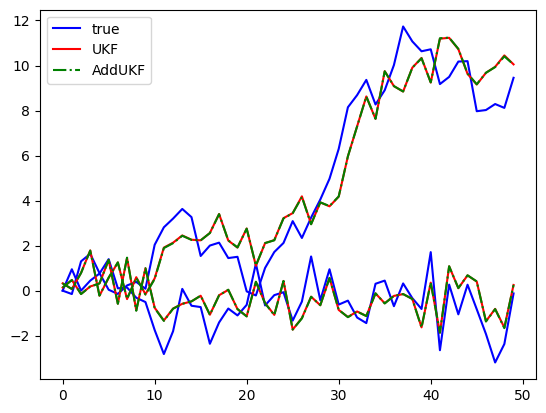

In [7]:
pl.figure()
lines_true = pl.plot(states, color="b")
lines_ukf = pl.plot(ukf_state_estimates, color="r", ls="-")
lines_akf = pl.plot(akf_state_estimates, color="g", ls="-.")
pl.legend(
    (lines_true[0], lines_ukf[0], lines_akf[0]),
    ("true", "UKF", "AddUKF"),
    loc="upper left",
)
pl.show()